ایشیائی اور بھارتی کھانوں: مزیدار کھانوں کی درجہ بندی کا ماڈل تیار کریں


## کھانوں کے درجہ بندی کرنے والے 1

اس سبق میں، ہم مختلف قسم کے درجہ بندی کرنے والے ماڈلز کا جائزہ لیں گے تاکہ *اجزاء کے ایک گروپ کی بنیاد پر کسی دی گئی قومی کھانے کی پیش گوئی کی جا سکے۔* اس دوران، ہم یہ بھی سیکھیں گے کہ الگورتھمز کو درجہ بندی کے کاموں کے لیے کس طرح استعمال کیا جا سکتا ہے۔

### [**لیکچر سے پہلے کا کوئز**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **تیاری**

یہ سبق ہمارے [پچھلے سبق](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb) پر مبنی ہے جہاں ہم نے:

-   ایشیا اور بھارت کے تمام شاندار کھانوں کے ڈیٹا سیٹ کا استعمال کرتے ہوئے درجہ بندی کا ایک نرم تعارف کیا 😋۔

-   ڈیٹا کو صاف اور تیار کرنے کے لیے کچھ [dplyr افعال](https://dplyr.tidyverse.org/) کا جائزہ لیا۔

-   ggplot2 کا استعمال کرتے ہوئے خوبصورت بصریات بنائیں۔

-   غیر متوازن ڈیٹا کو [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html) کے ذریعے پہلے سے پروسیس کرکے اس سے نمٹنے کا مظاہرہ کیا۔

-   یہ ظاہر کیا کہ اپنے recipe کو `prep` اور `bake` کیسے کریں تاکہ یہ یقینی بنایا جا سکے کہ یہ صحیح طریقے سے کام کرے گا۔

#### **پیشگی ضروریات**

اس سبق کے لیے، ہمیں اپنے ڈیٹا کو صاف، تیار اور بصری بنانے کے لیے درج ذیل پیکجز کی ضرورت ہوگی:

-   `tidyverse`: [tidyverse](https://www.tidyverse.org/) ایک [R پیکجز کا مجموعہ](https://www.tidyverse.org/packages) ہے جو ڈیٹا سائنس کو تیز، آسان اور مزیدار بناتا ہے!

-   `tidymodels`: [tidymodels](https://www.tidymodels.org/) فریم ورک ایک [پیکجز کا مجموعہ](https://www.tidymodels.org/packages/) ہے جو ماڈلنگ اور مشین لرننگ کے لیے استعمال ہوتا ہے۔

-   `themis`: [themis پیکج](https://themis.tidymodels.org/) غیر متوازن ڈیٹا سے نمٹنے کے لیے اضافی ترکیبوں کے مراحل فراہم کرتا ہے۔

-   `nnet`: [nnet پیکج](https://cran.r-project.org/web/packages/nnet/nnet.pdf) ایک واحد چھپی ہوئی تہہ کے ساتھ فیڈ فارورڈ نیورل نیٹ ورکس اور ملٹی نومیئل لاجسٹک ریگریشن ماڈلز کے تخمینے کے لیے افعال فراہم کرتا ہے۔

آپ انہیں اس طرح انسٹال کر سکتے ہیں:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

متبادل طور پر، نیچے دیا گیا اسکرپٹ یہ چیک کرتا ہے کہ آیا اس ماڈیول کو مکمل کرنے کے لیے درکار پیکجز آپ کے پاس موجود ہیں، اور اگر وہ غائب ہوں تو انہیں آپ کے لیے انسٹال کر دیتا ہے۔


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



## 1. ڈیٹا کو تربیتی اور ٹیسٹ سیٹس میں تقسیم کریں۔

ہم اپنی پچھلی سبق کے چند مراحل سے شروعات کریں گے۔

### ان اجزاء کو ہٹا دیں جو مختلف کھانوں کے درمیان الجھن پیدا کرتے ہیں، `dplyr::select()` کا استعمال کرتے ہوئے۔

چاول، لہسن اور ادرک سب کو پسند ہیں!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine almond angelica anise anise_seed apple apple_brandy apricot armagnac
1 indian  0      0        0     0          0     0            0       0       
2 indian  1      0        0     0          0     0            0       0       
3 indian  0      0        0     0          0     0            0       0       
4 indian  0      0        0     0          0     0            0       0       
5 indian  0      0        0     0          0     0            0       0       
  artemisia ⋯ whiskey white_bread white_wine whole_grain_wheat_flour wine wood
1 0         ⋯ 0       0           0          0                       0    0   
2 0         ⋯ 0       0           0          0                       0    0   
3 0         ⋯ 0       0           0          0                       0    0   
4 0         ⋯ 0       0           0          0                       0    0   
5 0         ⋯ 0       0           0          0                       0    0   
  yam yeast yogurt zucchini
1 0   0     0      0       
2 0   0     0      0       
3 0   0     0      0       
4 0   0     0      0       
5 0   0     1      0

cuisine  n  
1 korean   799
2 indian   598
3 chinese  442
4 japanese 320
5 thai     289

اب وقت آگیا ہے کہ ڈیٹا کو اس طرح تقسیم کیا جائے کہ 70% ڈیٹا تربیت کے لیے اور 30% ڈیٹا جانچ کے لیے مختص ہو۔ ہم `stratification` تکنیک بھی استعمال کریں گے تاکہ `ہر قسم کے کھانے کی تناسب` کو تربیت اور جانچ کے ڈیٹا سیٹس میں برقرار رکھا جا سکے۔

[rsample](https://rsample.tidymodels.org/)، جو Tidymodels کا ایک پیکج ہے، ڈیٹا کو مؤثر طریقے سے تقسیم کرنے اور دوبارہ نمونے لینے کے لیے بنیادی ڈھانچہ فراہم کرتا ہے:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine almond angelica anise anise_seed apple apple_brandy apricot armagnac
1 chinese 0      0        0     0          0     0            0       0       
2 chinese 0      0        0     0          0     0            0       0       
3 chinese 0      0        0     0          0     0            0       0       
4 chinese 0      0        0     0          0     0            0       0       
5 chinese 0      0        0     0          0     0            0       0       
  artemisia ⋯ whiskey white_bread white_wine whole_grain_wheat_flour wine wood
1 0         ⋯ 0       0           0          0                       1    0   
2 0         ⋯ 0       0           0          0                       1    0   
3 0         ⋯ 0       0           0          0                       0    0   
4 0         ⋯ 0       0           0          0                       0    0   
5 0         ⋯ 0       0           0          0                       0    0   
  yam yeast yogurt zucchini
1 0   0     0      0       
2 0   0     0      0       
3 0   0     0      0       
4 0   0     0      0       
5 0   0     0      0

cuisine  n  
1 korean   559
2 indian   418
3 chinese  309
4 japanese 224
5 thai     202

## 2. غیر متوازن ڈیٹا سے نمٹنا

جیسا کہ آپ نے اصل ڈیٹا سیٹ اور ہمارے تربیتی سیٹ میں دیکھا ہوگا، کھانوں کی تعداد میں کافی غیر مساوی تقسیم ہے۔ کورین کھانے *تقریباً* تھائی کھانوں سے 3 گنا زیادہ ہیں۔ غیر متوازن ڈیٹا اکثر ماڈل کی کارکردگی پر منفی اثر ڈالتا ہے۔ بہت سے ماڈلز اس وقت بہترین کام کرتے ہیں جب مشاہدات کی تعداد برابر ہو، اور اس وجہ سے غیر متوازن ڈیٹا کے ساتھ جدوجہد کرتے ہیں۔

غیر متوازن ڈیٹا سیٹس سے نمٹنے کے دو اہم طریقے ہیں:

-   اقلیت کے طبقے میں مشاہدات کا اضافہ کرنا: `اوور سیمپلنگ` جیسے SMOTE الگورتھم کا استعمال، جو اقلیت کے طبقے کے نئے مثالیں مصنوعی طور پر ان کیسز کے قریبی ہمسایوں کا استعمال کرتے ہوئے پیدا کرتا ہے۔

-   اکثریت کے طبقے سے مشاہدات کو ہٹانا: `انڈر سیمپلنگ`

پچھلے سبق میں، ہم نے ایک `recipe` کا استعمال کرتے ہوئے غیر متوازن ڈیٹا سیٹس سے نمٹنے کا مظاہرہ کیا تھا۔ ایک recipe کو ایک خاکہ سمجھا جا سکتا ہے جو بیان کرتا ہے کہ ڈیٹا سیٹ پر تجزیہ کے لیے تیار کرنے کے لیے کون سے اقدامات لاگو کیے جائیں۔ ہمارے معاملے میں، ہم اپنے `training set` کے لیے کھانوں کی تعداد میں مساوی تقسیم چاہتے ہیں۔ آئیے اس پر کام شروع کرتے ہیں۔


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

آپ یقیناً جا سکتے ہیں اور تصدیق کر سکتے ہیں (پریپ + بیک استعمال کرتے ہوئے) کہ نسخہ آپ کی توقع کے مطابق کام کرے گا - تمام کھانے کے لیبلز جن کے پاس `559` مشاہدات ہیں۔

چونکہ ہم اس نسخے کو ماڈلنگ کے لیے ایک پری پروسیسر کے طور پر استعمال کریں گے، ایک `workflow()` تمام پریپ اور بیک خود کرے گا، لہذا ہمیں نسخے کا دستی طور پر اندازہ لگانے کی ضرورت نہیں ہوگی۔

اب ہم ماڈل کی تربیت کے لیے تیار ہیں 👩‍💻👨‍💻!

## 3. اپنا کلاسیفائر منتخب کرنا

<p >
   <img src="../../images/parsnip.jpg"
   width="600"/>
   <figcaption>آرٹ ورک از @allison_horst</figcaption>


اب ہمیں فیصلہ کرنا ہے کہ اس کام کے لیے کون سا الگورتھم استعمال کریں 🤔۔

Tidymodels میں، [`parsnip package`](https://parsnip.tidymodels.org/index.html) مختلف انجنز (پیکجز) کے ساتھ ماڈلز پر کام کرنے کے لیے ایک مستقل انٹرفیس فراہم کرتا ہے۔ براہ کرم parsnip دستاویزات دیکھیں تاکہ [ماڈل کی اقسام اور انجنز](https://www.tidymodels.org/find/parsnip/#models) اور ان کے متعلقہ [ماڈل دلائل](https://www.tidymodels.org/find/parsnip/#model-args) کو دریافت کیا جا سکے۔ پہلی نظر میں یہ تنوع کافی حیران کن لگتا ہے۔ مثال کے طور پر، درج ذیل طریقے سب کلاسفیکیشن تکنیکوں کو شامل کرتے ہیں:

-   C5.0 رول پر مبنی کلاسفیکیشن ماڈلز

-   لچکدار امتیازی ماڈلز

-   لکیری امتیازی ماڈلز

-   ریگولرائزڈ امتیازی ماڈلز

-   لاجسٹک ریگریشن ماڈلز

-   ملٹی نومیئل ریگریشن ماڈلز

-   نائیو بے ماڈلز

-   سپورٹ ویکٹر مشینز

-   قریب ترین ہمسایہ

-   فیصلہ کن درخت

-   انسمبل طریقے

-   نیورل نیٹ ورکس

یہ فہرست جاری رہتی ہے!

### **کون سا کلاسفائر منتخب کریں؟**

تو، آپ کو کون سا کلاسفائر منتخب کرنا چاہیے؟ اکثر، کئی الگورتھمز کو آزمانا اور اچھے نتائج کی تلاش کرنا ایک طریقہ ہوتا ہے۔

> AutoML اس مسئلے کو آسانی سے حل کرتا ہے، یہ کلاؤڈ میں ان تقابلات کو چلاتا ہے، اور آپ کو اپنے ڈیٹا کے لیے بہترین الگورتھم منتخب کرنے دیتا ہے۔ اسے [یہاں آزمائیں](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott)

اس کے علاوہ، کلاسفائر کا انتخاب ہمارے مسئلے پر منحصر ہوتا ہے۔ مثال کے طور پر، جب نتیجہ کو `دو سے زیادہ کلاسز` میں تقسیم کیا جا سکتا ہو، جیسے ہمارے کیس میں، تو آپ کو `ملٹی کلاس کلاسفیکیشن الگورتھم` استعمال کرنا ہوگا بجائے `بائنری کلاسفیکیشن` کے۔

### **ایک بہتر طریقہ**

اندازے لگانے کے بجائے، ایک بہتر طریقہ یہ ہے کہ اس ڈاؤن لوڈ کے قابل [ML Cheat sheet](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott) کے خیالات پر عمل کریں۔ یہاں، ہم دریافت کرتے ہیں کہ ہمارے ملٹی کلاس مسئلے کے لیے ہمارے پاس کچھ اختیارات ہیں:

<p >
   <img src="../../images/cheatsheet.png"
   width="500"/>
   <figcaption>مائیکروسافٹ کے الگورتھم چیٹ شیٹ کا ایک حصہ، جو ملٹی کلاس کلاسفیکیشن کے اختیارات کو تفصیل سے بیان کرتا ہے</figcaption>


### **دلائل**

آئیے دیکھتے ہیں کہ دی گئی حدود کے تحت مختلف طریقوں پر غور کرتے ہوئے ہم کس طرح مسئلے کو حل کر سکتے ہیں:

-   **ڈیپ نیورل نیٹ ورک بہت بھاری ہیں**۔ ہمارے صاف لیکن محدود ڈیٹا سیٹ اور اس حقیقت کو مدنظر رکھتے ہوئے کہ ہم لوکل نوٹ بکس کے ذریعے ٹریننگ کر رہے ہیں، ڈیپ نیورل نیٹ ورک اس کام کے لیے بہت زیادہ بھاری ہیں۔

-   **دو کلاس والا کلاسیفائر نہیں**۔ ہم دو کلاس کلاسیفائر استعمال نہیں کرتے، اس لیے یہ آپشن ختم ہو جاتا ہے۔

-   **ڈسیژن ٹری یا لاجسٹک ریگریشن کام کر سکتے ہیں**۔ ڈسیژن ٹری کام کر سکتا ہے، یا ملٹی نومیئل ریگریشن/ملٹی کلاس لاجسٹک ریگریشن ملٹی کلاس ڈیٹا کے لیے موزوں ہو سکتا ہے۔

-   **ملٹی کلاس بوسٹڈ ڈسیژن ٹری مختلف مسئلہ حل کرتے ہیں**۔ ملٹی کلاس بوسٹڈ ڈسیژن ٹری نان پیرامیٹرک کاموں کے لیے زیادہ موزوں ہیں، جیسے کہ رینکنگ بنانے کے لیے ڈیزائن کیے گئے کام، اس لیے یہ ہمارے لیے کارآمد نہیں ہیں۔

عام طور پر، زیادہ پیچیدہ مشین لرننگ ماڈلز جیسے کہ اینسمبل میتھڈز پر کام شروع کرنے سے پہلے، ایک سادہ ماڈل بنانا بہتر ہوتا ہے تاکہ یہ سمجھا جا سکے کہ کیا ہو رہا ہے۔ اس سبق کے لیے، ہم `ملٹی نومیئل ریگریشن` ماڈل سے آغاز کریں گے۔

> لاجسٹک ریگریشن ایک تکنیک ہے جو اس وقت استعمال ہوتی ہے جب نتیجہ متغیر کیٹیگوریکل (یا نومینل) ہو۔ بائنری لاجسٹک ریگریشن کے لیے نتیجہ متغیر کی تعداد دو ہوتی ہے، جبکہ ملٹی نومیئل لاجسٹک ریگریشن کے لیے نتیجہ متغیر کی تعداد دو سے زیادہ ہوتی ہے۔ مزید پڑھنے کے لیے [ایڈوانسڈ ریگریشن میتھڈز](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html) دیکھیں۔

## 4. ملٹی نومیئل لاجسٹک ریگریشن ماڈل کو ٹرین اور ایویلیوایٹ کریں۔

Tidymodels میں، `parsnip::multinom_reg()` ایک ایسا ماڈل ڈیفائن کرتا ہے جو ملٹی کلاس ڈیٹا کی پیش گوئی کے لیے ملٹی نومیئل ڈسٹریبیوشن کا استعمال کرتے ہوئے لینیئر پریڈکٹرز کا استعمال کرتا ہے۔ اس ماڈل کو فٹ کرنے کے مختلف طریقے/انجن دیکھنے کے لیے `?multinom_reg()` دیکھیں۔

اس مثال کے لیے، ہم ڈیفالٹ [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) انجن کے ذریعے ایک ملٹی نومیئل ریگریشن ماڈل فٹ کریں گے۔

> میں نے `penalty` کی ویلیو تقریباً اتفاقیہ طور پر منتخب کی۔ اس ویلیو کو منتخب کرنے کے بہتر طریقے ہیں، یعنی `resampling` اور ماڈل کو `tuning` کے ذریعے، جن پر ہم بعد میں بات کریں گے۔
>
> اگر آپ ماڈل کے ہائپر پیرامیٹرز کو ٹیون کرنے کے بارے میں مزید سیکھنا چاہتے ہیں تو [Tidymodels: Get Started](https://www.tidymodels.org/start/tuning/) دیکھیں۔


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


شاندار کام 🥳! اب جب کہ ہمارے پاس ایک نسخہ اور ماڈل کی وضاحت موجود ہے، ہمیں انہیں ایک ایسے آبجیکٹ میں اکٹھا کرنے کا طریقہ تلاش کرنا ہوگا جو پہلے ڈیٹا کو پیشگی پروسیس کرے، پھر پیشگی پروسیس شدہ ڈیٹا پر ماڈل کو فٹ کرے اور ممکنہ بعد از پروسیسنگ سرگرمیوں کی بھی اجازت دے۔ Tidymodels میں، یہ آسان آبجیکٹ [`workflow`](https://workflows.tidymodels.org/) کہلاتا ہے اور آپ کے ماڈلنگ اجزاء کو آسانی سے رکھتا ہے! یہ وہی ہے جسے ہم *Python* میں *pipelines* کہتے ہیں۔

تو آئیے سب کچھ ایک ورک فلو میں اکٹھا کریں!📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


ورک فلو 👌👌! ایک **`workflow()`** کو بالکل اسی طرح فٹ کیا جا سکتا ہے جیسے ایک ماڈل کو۔ تو، ماڈل کو تربیت دینے کا وقت ہے!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

ماڈل کی تربیت کے دوران سیکھے گئے coefficients کا نتیجہ دکھاتا ہے۔

### تربیت شدہ ماڈل کا جائزہ لیں

اب وقت ہے کہ ماڈل کی کارکردگی 📏 کو جانچنے کے لیے اسے ٹیسٹ سیٹ پر پرکھا جائے! آئیے ٹیسٹ سیٹ پر پیش گوئیاں کرنے سے شروع کرتے ہیں۔


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine .pred_class
1 indian  thai       
2 indian  indian     
3 indian  indian     
4 indian  indian     
5 indian  indian

شاندار کام! ٹائیڈی ماڈلز میں، ماڈل کی کارکردگی کا جائزہ لینے کے لیے [یارڈ اسٹک](https://yardstick.tidymodels.org/) استعمال کیا جا سکتا ہے - ایک پیکیج جو کارکردگی کے میٹرکس کے ذریعے ماڈلز کی مؤثریت کو ماپنے کے لیے استعمال ہوتا ہے۔ جیسا کہ ہم نے اپنے لاجسٹک ریگریشن سبق میں کیا، آئیے ایک کنفیوشن میٹرکس کا حساب لگا کر شروع کرتے ہیں۔


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

جب متعدد کلاسوں سے نمٹ رہے ہوں، تو عام طور پر اسے ایک ہیٹ میپ کے طور پر تصور کرنا زیادہ آسان ہوتا ہے، اس طرح:


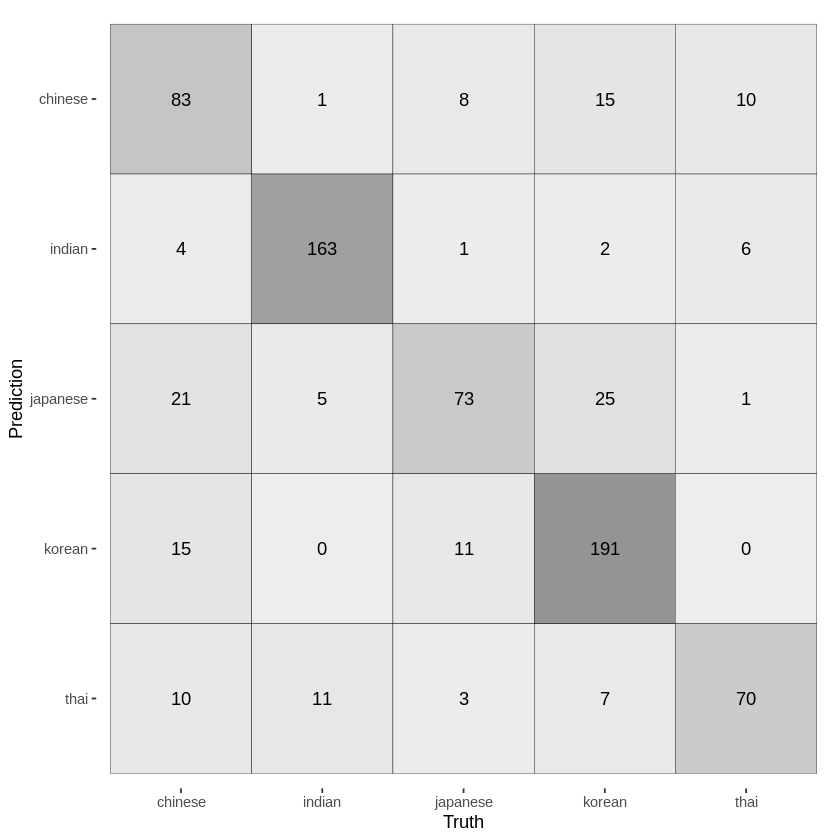

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

کنفیوشن میٹرکس کے پلاٹ میں گہرے خانے زیادہ تعداد کے کیسز کو ظاہر کرتے ہیں، اور آپ امید کرتے ہیں کہ ایک گہری خانے کی ترچھی لائن دیکھ سکیں گے جو ان کیسز کو ظاہر کرتی ہے جہاں پیش گوئی کی گئی اور اصل لیبل ایک جیسے ہیں۔

اب آئیے کنفیوشن میٹرکس کے لیے خلاصہ شماریات کا حساب لگاتے ہیں۔


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric              .estimator .estimate
1  accuracy             multiclass 0.7880435
2  kap                  multiclass 0.7276583
3  sens                 macro      0.7780927
4  spec                 macro      0.9477598
5  ppv                  macro      0.7585583
6  npv                  macro      0.9460080
7  mcc                  multiclass 0.7292724
8  j_index              macro      0.7258524
9  bal_accuracy         macro      0.8629262
10 detection_prevalence macro      0.2000000
11 precision            macro      0.7585583
12 recall               macro      0.7780927
13 f_meas               macro      0.7641862

اگر ہم کچھ میٹرکس جیسے کہ درستگی، حساسیت، اور پی پی وی پر توجہ مرکوز کریں، تو شروعات کے لیے ہم زیادہ پیچھے نہیں ہیں 🥳!

## 4. مزید گہرائی میں جانا

آئیے ایک باریک سوال پوچھتے ہیں: کس معیار کی بنیاد پر کسی خاص قسم کے کھانے کو پیش گوئی کے نتیجے کے طور پر منتخب کیا جاتا ہے؟

دراصل، شماریاتی مشین لرننگ الگورتھمز، جیسے کہ لاجسٹک ریگریشن، `امکان` پر مبنی ہوتے ہیں؛ اس لیے جو چیز درحقیقت ایک کلاسیفائر کے ذریعے پیش گوئی کی جاتی ہے وہ ممکنہ نتائج کے ایک سیٹ پر ایک احتمال کی تقسیم ہوتی ہے۔ وہ کلاس جس کا امکان سب سے زیادہ ہوتا ہے، اسے دیے گئے مشاہدات کے لیے سب سے زیادہ ممکنہ نتیجہ کے طور پر منتخب کیا جاتا ہے۔

آئیے اس کو عملی طور پر دیکھتے ہیں، سخت کلاس پیش گوئیاں اور احتمالات دونوں بنا کر۔


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine .pred_class .pred_chinese .pred_indian .pred_japanese .pred_korean
1 indian  thai        1.551259e-03  0.4587877    5.988039e-04   2.428503e-04
2 indian  indian      2.637133e-05  0.9999488    6.648651e-07   2.259993e-05
3 indian  indian      1.049433e-03  0.9909982    1.060937e-03   1.644947e-05
4 indian  indian      6.237482e-02  0.4763035    9.136702e-02   3.660913e-01
5 indian  indian      1.431745e-02  0.9418551    2.945239e-02   8.721782e-03
  .pred_thai  
1 5.388194e-01
2 1.577948e-06
3 6.874989e-03
4 3.863391e-03
5 5.653283e-03

کیا آپ وضاحت کر سکتے ہیں کہ ماڈل کو کیوں یقین ہے کہ پہلی مشاہدہ تھائی ہے؟

## **🚀چیلنج**

اس سبق میں، آپ نے اپنے صاف کردہ ڈیٹا کا استعمال کرتے ہوئے ایک مشین لرننگ ماڈل بنایا جو اجزاء کی ایک سیریز کی بنیاد پر قومی کھانے کی پیش گوئی کر سکتا ہے۔ کچھ وقت نکالیں اور [بہت سے اختیارات](https://www.tidymodels.org/find/parsnip/#models) کو پڑھیں جو ٹائیڈی ماڈلز ڈیٹا کو درجہ بندی کرنے کے لیے فراہم کرتے ہیں اور [دیگر طریقے](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) جو ملٹی نومیئل ریگریشن کو فٹ کرنے کے لیے دستیاب ہیں۔

#### خصوصی شکریہ:

[`ایلیسن ہورسٹ`](https://twitter.com/allison_horst/) کا شکریہ کہ انہوں نے شاندار تصویریں بنائیں جو R کو زیادہ خوش آمدید اور دلچسپ بناتی ہیں۔ مزید تصاویر ان کے [گیلری](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM) میں دیکھیں۔

[کاسی بریویو](https://www.twitter.com/cassieview) اور [جن لوپر](https://www.twitter.com/jenlooper) کا شکریہ کہ انہوں نے اس ماڈیول کا اصل Python ورژن تخلیق کیا ♥️

<br>
کچھ لطیفے شامل کرنے کا سوچا تھا لیکن مجھے کھانے کے لطیفے سمجھ نہیں آتے 😅۔

<br>

خوش رہیں اور سیکھتے رہیں،

[ایرک](https://twitter.com/ericntay)، گولڈ مائیکروسافٹ لرن اسٹوڈنٹ ایمبیسیڈر۔



---

**ڈس کلیمر**:  
یہ دستاویز AI ترجمہ سروس [Co-op Translator](https://github.com/Azure/co-op-translator) کا استعمال کرتے ہوئے ترجمہ کی گئی ہے۔ ہم درستگی کے لیے پوری کوشش کرتے ہیں، لیکن براہ کرم آگاہ رہیں کہ خودکار ترجمے میں غلطیاں یا عدم درستگی ہو سکتی ہیں۔ اصل دستاویز کو اس کی اصل زبان میں مستند ذریعہ سمجھا جانا چاہیے۔ اہم معلومات کے لیے، پیشہ ور انسانی ترجمہ کی سفارش کی جاتی ہے۔ اس ترجمے کے استعمال سے پیدا ہونے والی کسی بھی غلط فہمی یا غلط تشریح کے لیے ہم ذمہ دار نہیں ہیں۔
